C:\Users\prabh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Davies-Bouldin Index: 1.3053561467723618


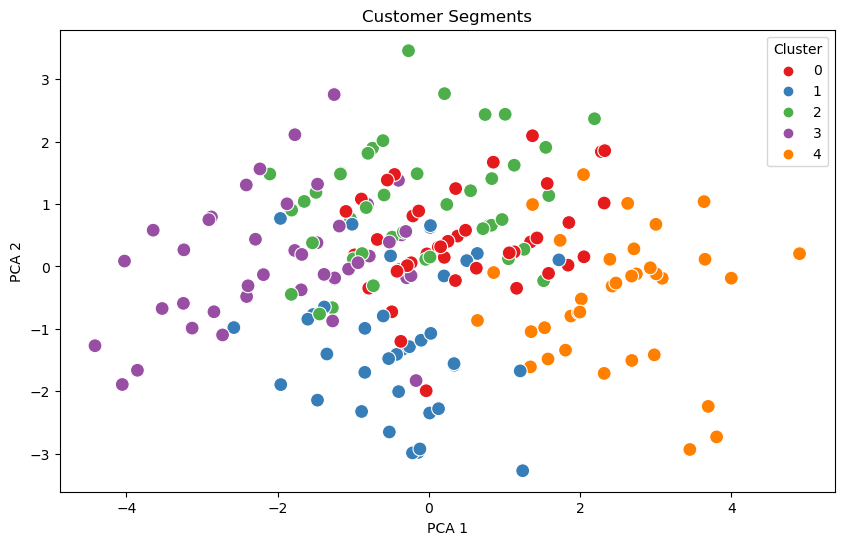

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Setting environment variable to disable multi-threading
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Load the data
customers_df = pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Merge the datasets on CustomerID
merged_df = pd.merge(customers_df, transactions_df, on="CustomerID")

# Feature Engineering for Clustering
# Creating aggregate features for each customer based on transaction data
customer_agg = merged_df.groupby('CustomerID').agg(
    TotalPurchaseValue=('TotalValue', 'sum'),
    AvgPurchaseValue=('TotalValue', 'mean'),
    TotalQuantity=('Quantity', 'sum'),
    AvgQuantity=('Quantity', 'mean'),
    TotalTransactions=('TransactionID', 'nunique')
).reset_index()

# Merging the customer aggregation data with customer profile data
customer_data = pd.merge(customers_df, customer_agg, on='CustomerID')

# Preprocessing - Encoding categorical variables (e.g., Region)
customer_data = pd.get_dummies(customer_data, columns=['Region'], drop_first=True)

# Features for clustering
features = customer_data[['TotalPurchaseValue', 'AvgPurchaseValue', 'TotalQuantity', 'AvgQuantity', 'TotalTransactions'] + [col for col in customer_data.columns if 'Region' in col]]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans Clustering
num_clusters = 5  # Feel free to change this between 2 and 10
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# Visualizing the Clusters using PCA for dimensionality reduction (2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=customer_data['Cluster'], palette='Set1', s=100)
plt.title("Customer Segments")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()
